# Testing

## Load Train and Test Set

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

train = pd.read_csv('../Data/phishing_train.csv')
test = pd.read_csv('../Data/phishing_test.csv')

## Preprocessing

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# splitting the data
X_train = train.drop(columns="Result")
y_train = train["Result"]

X_test = test.drop(columns="Result")
y_test = test["Result"]

## Model 

We used the best parameters from the training for Random Forest Model with n_estimators, max_depth, and max_features. 

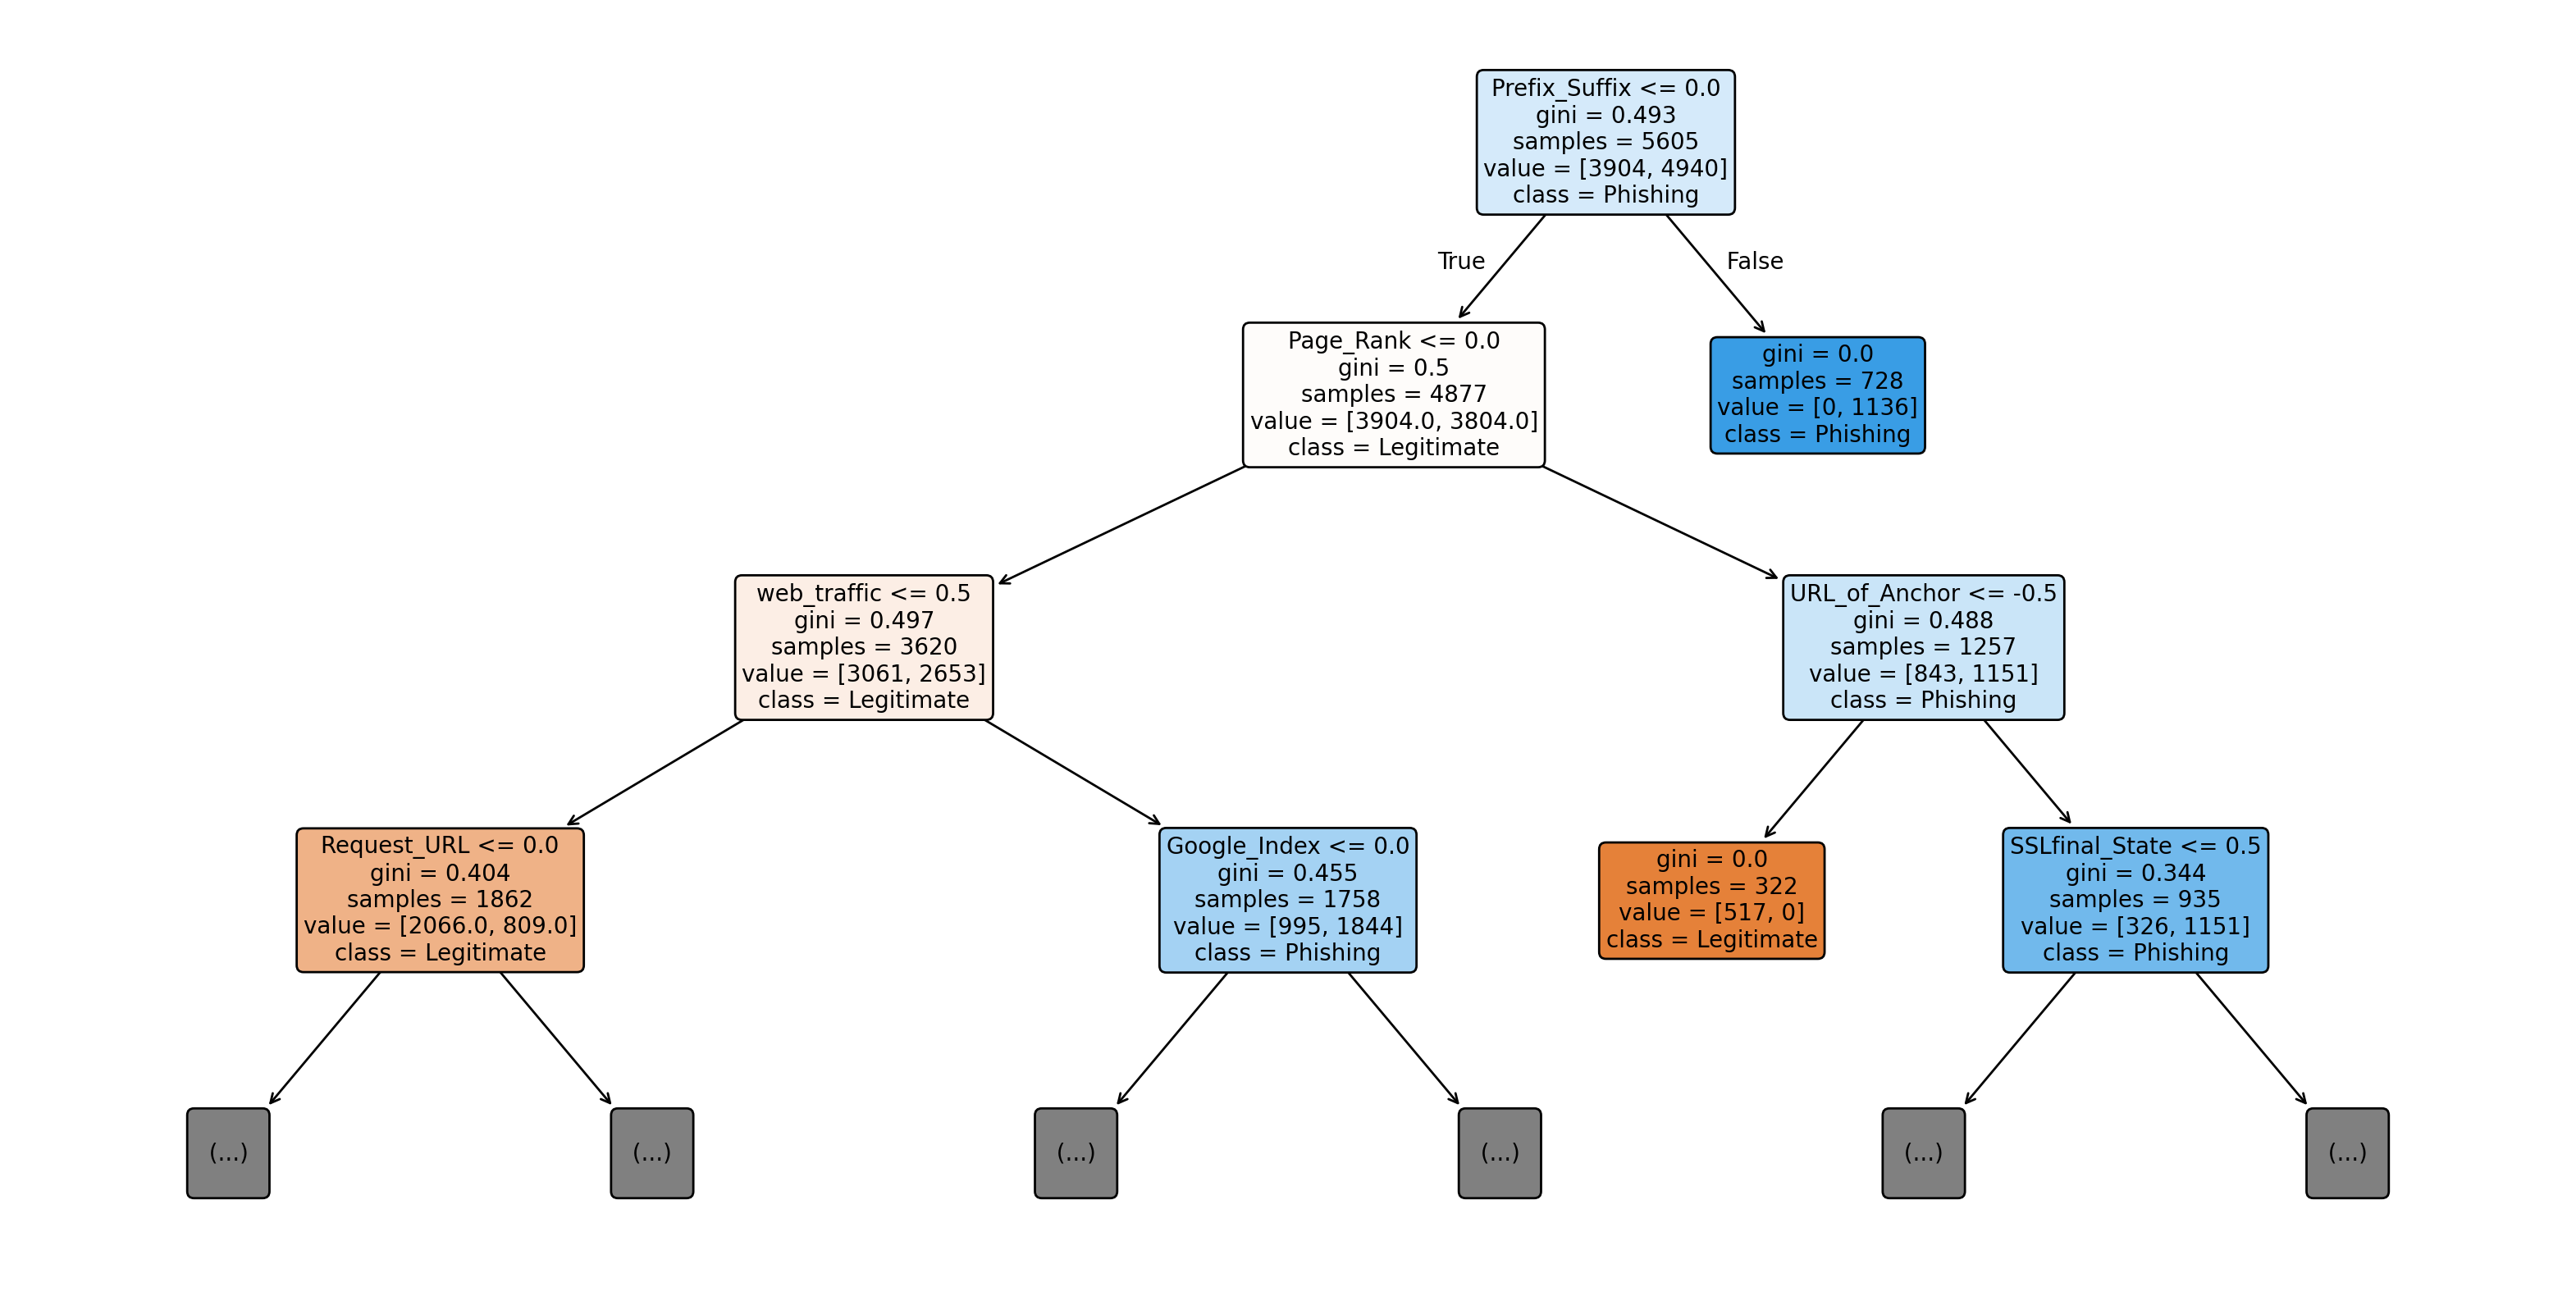

In [14]:
rf = RandomForestClassifier(n_estimators=200, max_depth=20, max_features='log2', random_state=42)

rf.fit(X_train, y_train)

# decision tree
individual = rf.estimators_[0]

plt.figure(figsize=(20, 10), dpi=200)
plot_tree = tree.plot_tree(individual, 
                           max_depth=3,
                           feature_names=X_train.columns, 
                           class_names=['Legitimate', 'Phishing'], 
                           filled=True, 
                           rounded=True, 
                           fontsize=10)
plt.show()

In [15]:
y_pred = rf.predict(X_test)

## Evaluation

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 908   48]
 [  22 1233]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211


Accuracy: 0.968340117593849
